In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Fri, 29 Mar 2024 10:27


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format
index_map = {0:'Rest', 1:'City of SeaTac', 'All':'All', 'TOTAL':'TOTAL'}

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"28,758,482","29,435,398","676,916",2.35%
Arterial,"27,365,760","25,451,709","-1,914,051",-6.99%
Collector,"4,708,402","3,879,724","-828,678",-17.60%
Ramp,"859,685","657,787","-201,898",-23.49%
Total,"61,692,329","59,424,618","-2,267,711",-3.68%


#### Daily | By Facility Type - City of SeaTac

In [6]:
df1 = df[df['subarea_flag']==1]

In [7]:
_df = df1.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df = _df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total']).fillna(0)
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/np.maximum(_df['observed'],1)
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"1,655,333","1,640,477","-14,856",-0.90%
Arterial,"1,516,266","1,449,075","-67,191",-4.43%
Collector,"318,119","213,337","-104,782",-32.94%
Ramp,"103,083","46,204","-56,879",-55.18%
Total,"3,592,801","3,349,093","-243,708",-6.78%


#### Daily | By Facility Type - Other Counties

In [8]:
df2 = df[df['subarea_flag'] != 1]

In [9]:
_df = df2.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"27,103,149","27,794,921","691,772",2.55%
Arterial,"25,849,494","24,002,634","-1,846,860",-7.14%
Collector,"4,390,283","3,666,387","-723,896",-16.49%
Ramp,"756,602","611,583","-145,019",-19.17%
Total,"58,099,528","56,075,525","-2,024,003",-3.48%


----
### Daily | By County

In [10]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"33,602,943","33,264,694","-338,249",-1.01%
Kitsap,"4,567,541","3,715,951","-851,590",-18.64%
Pierce,"13,921,938","13,106,594","-815,344",-5.86%
Snohomish,"9,599,907","9,337,379","-262,528",-2.73%
Total,"61,692,329","59,424,618","-2,267,711",-3.68%


---
### City of SeaTac

In [11]:
index_map = {0:'Other', 1:'City of SeaTac'}
_df = df.groupby('subarea_flag').sum()[['observed','modeled']]
_df = _df.sort_index(ascending=False)
_df.index = _df.index.map(index_map)
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
subarea_flag,,,,
City of SeaTac,"3,592,801","3,349,093","-243,708",-6.78%
Other,"58,099,528","56,075,525","-2,024,003",-3.48%
Total,"61,692,329","59,424,618","-2,267,711",-3.68%


----
### Daily | Scatterplots 

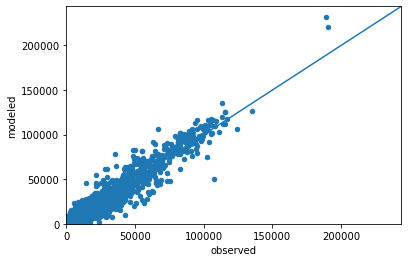

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.9604057122892531


---
By County

King r^2: 0.9673042391558101


Kitsap r^2: 0.9324780740530907
Pierce r^2: 0.9619347073589813


Snohomish r^2: 0.9367965357959377


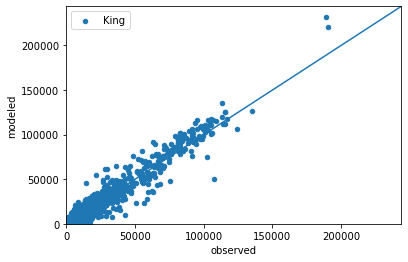

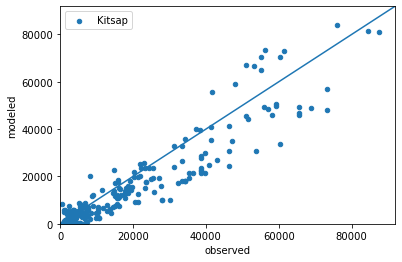

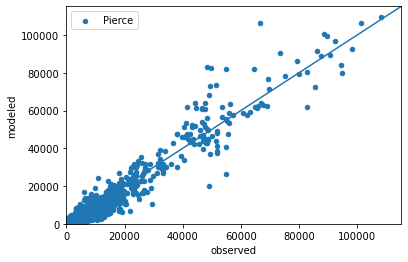

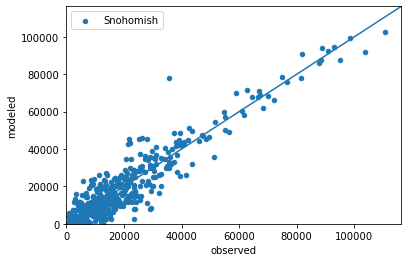

In [14]:
for county in np.unique(df[~df.county.isna()]['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

#### City of SeaTac

Other r^2: 0.9614030048688496
City of SeaTac r^2: 0.9516867231332001


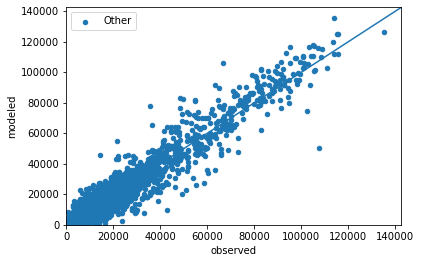

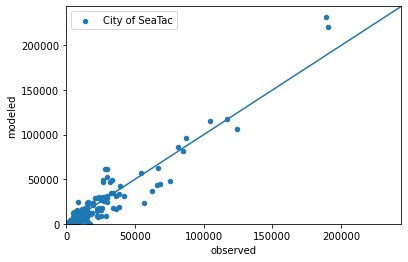

In [15]:
subarea_names = ['Other', 'City of SeaTac']
for county in np.unique(df[~df.county.isna()]['subarea_flag']):
    _df = df[df['subarea_flag'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=str(subarea_names[int(county)]))
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(subarea_names[int(county)]) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.9360025918827938
r^2 Arterial: 0.842640297713181


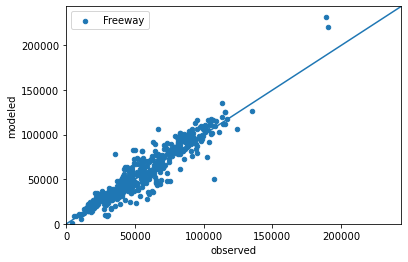

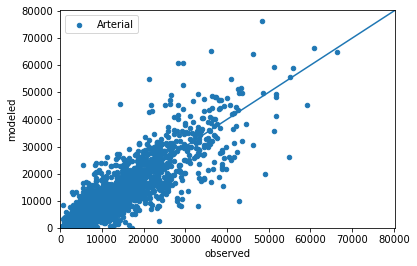

In [16]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - City of SeaTac

r^2 Freeway: 0.9673927484400959
r^2 Arterial: 0.7337403144260787


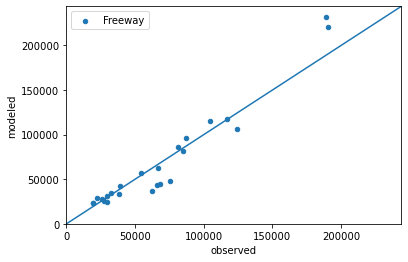

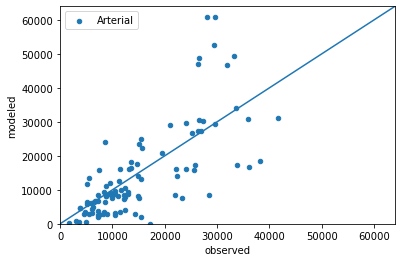

In [17]:
df1 = df[df['subarea_flag'] == 1]
for factype in ['Freeway','Arterial']:
    _df = df1[df1['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - Other Counties

r^2 Freeway: 0.9301222486777886
r^2 Arterial: 0.8517735745219308


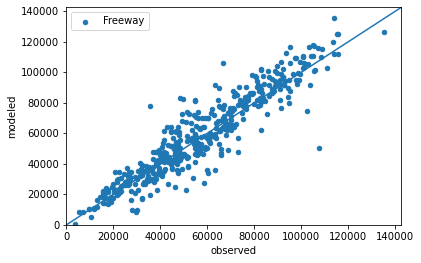

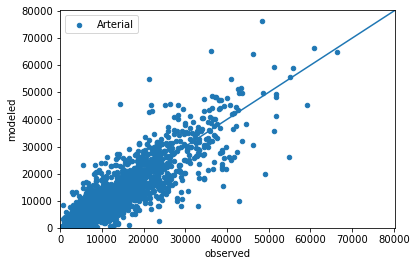

In [18]:
df2 = df[(df['subarea_flag'] != 1) & (~df.county.isna())]
if df2.shape[0] > 0:
    for factype in ['Freeway','Arterial']:
        _df = df2[df2['@facilitytype'] == factype]
        ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
        lim = _df[['observed','modeled']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
        print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.9217794697594633


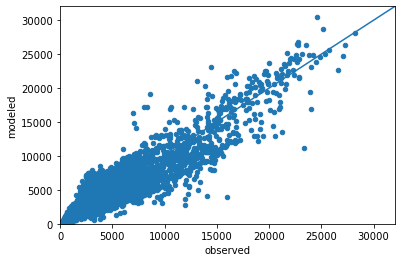

In [19]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - City of SeaTac**

r^2: 0.9091367548077733


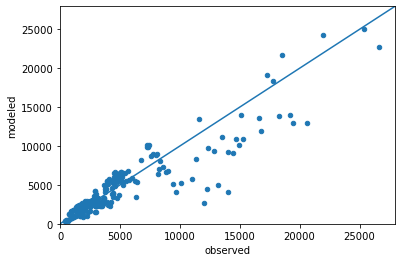

In [20]:
df1 = df[df['subarea_flag'] == 1]
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df1[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['observed'],df1['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - Other**

r^2: 0.9233023379831279


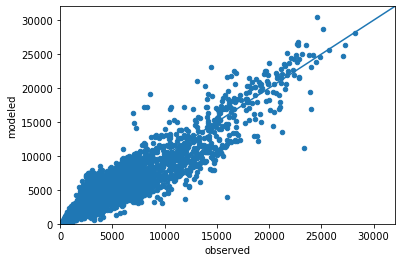

In [21]:
df2 = df[df['subarea_flag'] != 1]
ax = df2.plot(kind='scatter', x='observed', y='modeled')
lim = df2[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['observed'],df2['modeled'])
print('r^2: ' + str(r_value))

### Truck Counts

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_truck_volume.csv'))

##### Medium Trucks

In [23]:
_df = df.groupby('@facilitytype').sum()[['observed_medt','modeled_medt']].rename(columns={'modeled_medt':'modeled','observed_medt':'observed'})
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"17,935","38,047","20,112",112.14%
Arterial,"80,281","61,348","-18,933",-23.58%
Collector,"15,929","3,919","-12,010",-75.40%
Ramp,959,"1,066",107,11.19%
Total,"115,103","104,380","-10,723",-9.32%


##### Heavy Trucks

In [24]:
_df = df.groupby('@facilitytype').sum()[['observed_hvyt','modeled_hvyt']].rename(columns={'modeled_hvyt':'modeled','observed_hvyt':'observed'})
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"22,070","42,892","20,822",94.34%
Arterial,"19,837","4,999","-14,838",-74.80%
Collector,"1,837",492,"-1,345",-73.20%
Ramp,249,0,-249,-100.00%
Total,"43,992","48,383","4,390",9.98%


##### Total Trucks

In [25]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"40,005","80,938","40,934",102.32%
Arterial,"100,118","66,347","-33,771",-33.73%
Collector,"17,766","4,411","-13,355",-75.17%
Ramp,"1,207","1,066",-141,-11.71%
Total,"159,096","152,762","-6,333",-3.98%


###### Scatter Plot

r^2: 0.9486356031959227


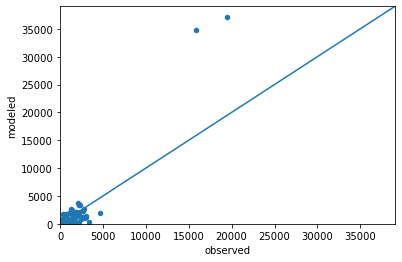

In [26]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,subarea_flag,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","563,945",King,0,"-4,472",-0.79%
1,KENT,"550,322","255,979",King,1,"-294,343",-53.49%
2,KENT,"550,322","266,548",King,0,"-283,774",-51.57%
3,SEATTLE - SOUTH OF CBD,"526,500","539,292",King,0,"12,792",2.43%
4,SHIP CANAL,"519,802","573,818",King,0,"54,016",10.39%
5,KIRKLAND-REDMOND,"414,120","416,441",King,0,"2,321",0.56%
6,MILL CREEK,"400,848","410,314",King,0,"9,466",2.36%
7,SOUTH BELLEVUE,"399,500","384,588",King,0,"-14,912",-3.73%
8,SEATTLE - NORTH,"372,000","393,446",King,0,"21,446",5.76%
9,TACOMA - EAST OF CBD,"312,164","344,850",Pierce,0,"32,686",10.47%


r^2 : 0.892282602032555


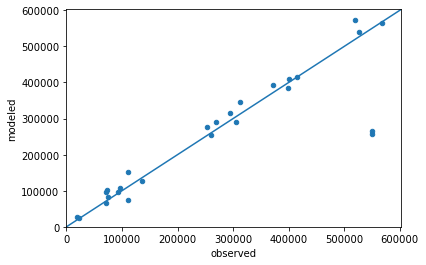

In [28]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - City of Seatac

In [29]:
df1 = df[(df['subarea_flag'] == 1) & (df['name']!='KENT')].drop(columns='subarea_flag')
df1 = df1.append(df1.sum(numeric_only=True), ignore_index=True)
df1.at[df1.index[-1], 'name'] = 'TOTAL'
#df1.at['C', 'name'] = 10
df1['percent_diff'] = df1['diff']/df1['observed']
df1[['percent_diff']] = df1[['percent_diff']].applymap(format_percent)
df1

,name,observed,modeled,county,diff,percent_diff
0,SEATAC,"73,635","101,097",King,"27,462",37.29%
1,TOTAL,"73,635","101,097",NaN,"27,462",37.29%


r^2 : 0.0


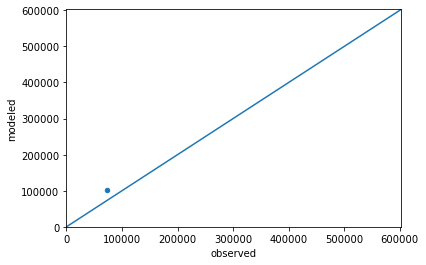

In [30]:
import warnings
warnings.filterwarnings('ignore')
df1 = df1.head(-1)
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['observed'],df1['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - Other

In [31]:
df2 = df[(df['subarea_flag'] != 1) | (df['name']=='KENT')].drop(columns='subarea_flag').groupby(['name','county'],as_index=False).agg({'observed':'first','modeled':'sum'})
df2['diff'] = df2['modeled']-df2['observed']
df2 = df2.append(df2.sum(numeric_only=True), ignore_index=True)
df2.at[df2.index[-1], 'name'] = 'TOTAL'
#df2.at['C', 'name'] = 10
df2['percent_diff'] = df2['diff']/df2['observed']
df2[['percent_diff']] = df2[['percent_diff']].applymap(format_percent)
df2

,name,county,observed,modeled,diff,percent_diff
0,AGATE PASS BRIDGE,Kitsap,"22,000","23,402","1,402",6.37%
1,AUBURN - SOUTH KING,King,"568,417","563,945","-4,472",-0.79%
2,BOTHELL,King,"293,729","314,706","20,977",7.14%
3,CROSS SOUND,Kitsap,"18,530","27,481","8,951",48.30%
4,GIG HARBOR,Pierce,"71,040","96,541","25,501",35.90%
5,KENT,King,"550,322","522,527","-27,795",-5.05%
6,KIRKLAND-REDMOND,King,"414,120","416,441","2,321",0.56%
7,LYNNWOOD-BOTHELL,King,"269,900","291,591","21,691",8.04%
8,MAPLE VALLEY,King,"71,874","66,100","-5,774",-8.03%
9,MILL CREEK,King,"400,848","410,314","9,466",2.36%


r^2 : 0.9932174572897549


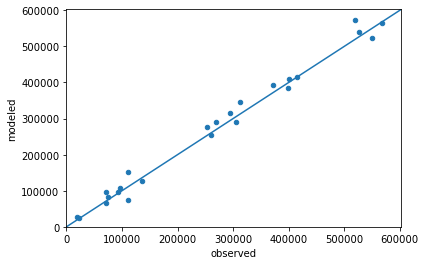

In [32]:
df2 = df2.head(-1)
if df2.shape[0] > 0:
    ax = df2.plot(kind='scatter', x='observed', y='modeled')
    lim = df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df2['observed'],df2['modeled'])
    print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [33]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
sorted_values = df.sort_values('observed_5to20', ascending=False).agency.to_list() + ['TOTAL']
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'agency'] = 'TOTAL'
df[['perc_diff']] = df['diff']/df['observed_5to20']
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.set_index('agency').reindex(sorted_values)

,observed_5to20,modeled_5to20,diff,perc_diff
agency,,,,
King County Metro,"392,694","381,722","-10,972",-2.79%
Sound Transit,"148,468","151,236","2,768",1.86%
Community Transit,"30,918","35,983","5,064",16.38%
Pierce Transit,"27,233","35,458","8,225",30.20%
Washington Ferries,"16,912","19,273","2,362",13.96%
Kitsap Transit,"8,669","22,862","14,193",163.71%
Everett Transit,"3,290","2,109","-1,182",-35.92%
TOTAL,"628,185","648,643","20,459",3.26%


----
### By Transit Routes servicing City of SeaTac

In [34]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_lines_seatac.csv')
df[['route_code']] = df[['route_code']].astype(int).astype('str')
df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df = df[['agency','route_code', 'description', 'observed_5to20','modeled_5to20','diff']]
sorted_values = df.sort_values(['agency','observed_5to20'], ascending=False).route_code.to_list() + ['TOTAL']
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'agency'] = 'TOTAL'
df.at[df.index[-1], 'route_code'] = 'TOTAL'
df.at[df.index[-1], 'description'] = 'TOTAL'
df[['perc_diff']] = df['diff']/df['observed_5to20']
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.set_index('route_code').reindex(sorted_values)

,agency,description,observed_5to20,modeled_5to20,diff,perc_diff
route_code,,,,,,
6996,Sound Transit,LINK: SeaTac - Downt,"69,383","58,669","-10,714",-15.44%
6590,Sound Transit,590 Tacoma - Seattle,"2,656","5,275","2,620",98.63%
6577,Sound Transit,577 Federal Way - Se,"1,916","2,159",243,12.68%
6594,Sound Transit,594 Lakewood - Seatt,"1,828","3,959","2,132",116.65%
6574,Sound Transit,574 Lakewood - SeaTa,"1,768","2,088",320,18.10%
6578,Sound Transit,578 Puyallup - Seatt,"1,686","4,644","2,958",175.38%
6560,Sound Transit,560 Bellevue - Sea-T,"1,681","2,991","1,310",77.92%
6592,Sound Transit,592 Olympia/DuPont -,702,908,206,29.37%
6586,Sound Transit,586 Tacoma - U. Dist,472,61,-411,-87.07%


----
### By Transit Routes servicing Seattle Airport

In [35]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_lines_airport_seatac.csv')
df[['route_code']] = df[['route_code']].astype(int).astype('str')
df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df = df[['agency','route_code', 'description', 'observed_5to20','modeled_5to20','diff']]
sorted_values = df.sort_values(['agency','observed_5to20'], ascending=False).route_code.to_list() + ['TOTAL']
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'agency'] = 'TOTAL'
df.at[df.index[-1], 'route_code'] = 'TOTAL'
df.at[df.index[-1], 'description'] = 'TOTAL'
df[['perc_diff']] = df['diff']/df['observed_5to20']
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.set_index('route_code').reindex(sorted_values)

,agency,description,observed_5to20,modeled_5to20,diff,perc_diff
route_code,,,,,,
6996,Sound Transit,LINK: SeaTac - Downt,"69,383","58,669","-10,714",-15.44%
6574,Sound Transit,574 Lakewood - SeaTa,"1,768","2,088",320,18.10%
6560,Sound Transit,560 Bellevue - Sea-T,"1,681","2,991","1,310",77.92%
1180,King County Metro,180 Auburn Station -,"3,911","6,150","2,239",57.24%
1156,King County Metro,156 Southcenter - Se,"1,027","1,267",240,23.32%
TOTAL,TOTAL,TOTAL,"77,770","71,164","-6,606",-8.49%


----
### Key Routes
#### Ferries

In [36]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
sorted_values = _df.sort_values('observed_5to20', ascending=False).description.to_list() + ['TOTAL']
_df = _df.append(_df.sum(numeric_only=True), ignore_index=True)
_df.at[_df.index[-1], 'description'] = 'TOTAL'
_df[['perc_diff']] = _df['diff']/_df['observed_5to20']
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,POF Seattle - West S,"1,356",528,-828,-61.04%
1,POF Seattle - Vashon,670,514,-156,-23.30%
2,WSF Kingston - Edmon,"1,732",696,"-1,037",-59.85%
3,WSF Bainbridge Islan,"8,857","13,232","4,375",49.40%
4,WSF Bremerton - Seat,"4,484","3,401","-1,083",-24.16%
5,WSF Fauntleroy - Sou,365,32,-334,-91.37%
6,WSF Vashon Island -,946,"1,354",408,43.15%
7,WSF Southworth - Vas,239,327,89,37.15%
8,WSF Point Defiance -,289,231,-57,-19.78%
9,TOTAL,"18,937","20,315","1,378",7.28%


r^2 : 0.9807306165279793


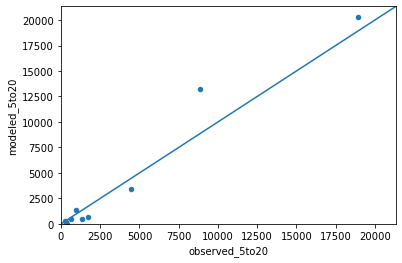

In [37]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [38]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
0,1973,POF West Seattle - S,919
4,4202,POF Bremerton - Anna,766
1,1975,POF Vashon Island -,735
3,4201,POF Bremerton - Pt O,693
2,4200,POF Seattle - Bremer,633
7,5003,WSF Bremerton - Seat,532
8,5005,WSF Vashon Island -,358
9,5006,WSF Southworth - Vas,302
10,5007,WSF Point Defiance -,278
6,5002,WSF Bainbridge Islan,264


#### Rail

In [39]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,"69,383","58,669","-10,714",-15.44%
1,Sounder South,"15,356","17,632","2,275",14.82%
2,Sounder North,"1,667","2,285",618,37.08%


r^2 : 0.9972624640856707


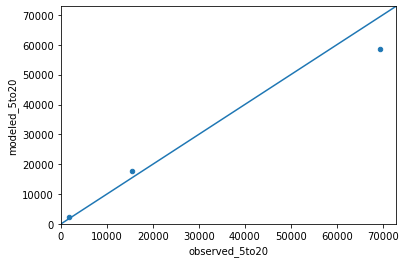

In [40]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [41]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,"15,336","14,055","-1,281",-8.35%
4,C Line RapidRide,"11,368","13,156","1,788",15.73%
1,KC Metro 40,"11,405","12,192",787,6.90%
10,Sound Transit 550,"9,168","11,267","2,100",22.90%
0,KC Metro 7,"10,150","10,052",-98,-0.96%
5,D Line RapidRide,"13,078","9,296","-3,782",-28.92%
2,A Line RapidRide,"8,522","7,425","-1,097",-12.87%
7,F Line RapidRide,"5,267","5,830",563,10.68%
3,B Line RapidRide,"5,914","5,681",-233,-3.94%
8,SLU Streetcar,"1,703","1,379",-325,-19.06%


r^2 : 0.9193309587803374


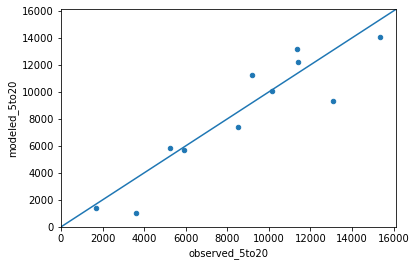

In [42]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.8915597508781169
r^2 Everett Transit: -0.3238811739602276
r^2 King County Metro: 0.9231615052026086
r^2 Kitsap Transit: 0.7932108127223934
r^2 Pierce Transit: 0.8832383005438367
r^2 Sound Transit: 0.9907335196176466
r^2 Washington Ferries: 0.9648634828702705


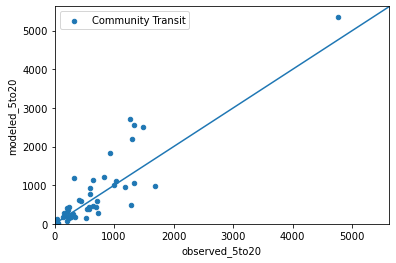

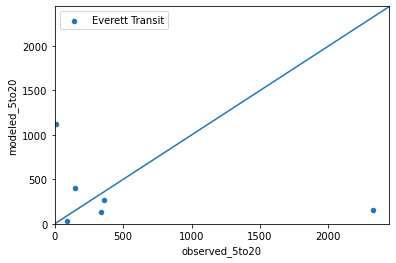

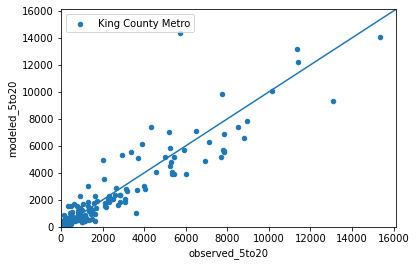

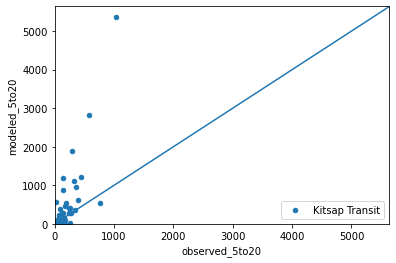

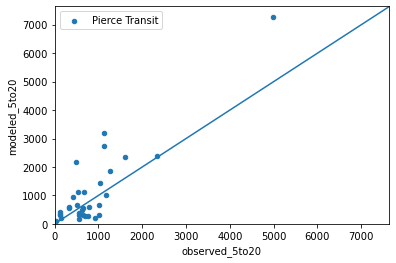

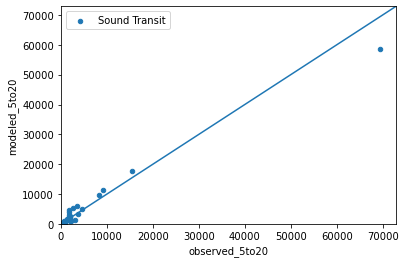

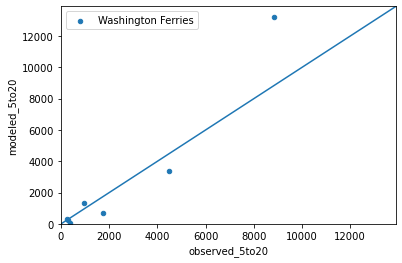

In [43]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
        lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [44]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","8,730",-686,-7.28%
Westlake,"10,904","6,067","-4,837",-44.36%
University St,"5,257","5,253",-4,-0.08%
Pioneer Square,"3,865","4,834",969,25.08%
Int'l District,"5,647","2,621","-3,027",-53.59%
Capitol Hill,"7,016","7,092",75,1.07%
Stadium,"1,912",733,"-1,179",-61.66%
SODO,"2,108","2,951",843,40.00%
Beacon Hill,"2,587","2,069",-518,-20.02%


Sound Transit Station Groupings

In [45]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","8,730",-686,-7.28%
Capitol Hill,"7,016","7,092",75,1.07%
Westlake/University St,"16,161","11,320","-4,841",-29.96%
Pioneer Square/Int'l District,"9,512","7,455","-2,057",-21.63%
Stadium/SODO,"4,020","3,684",-336,-8.36%
Beacon Hill/Mount Baker,"4,809","4,167",-642,-13.35%
Columbia City,"2,376","2,558",182,7.67%
Othello/Rainier Beach,"4,412","4,797",385,8.72%
Tukwila Int'l Blvd,"2,779","2,867",88,3.17%


# Stop Transfers

### Light Rail

In [46]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.38,-99.00,99.38,-100.38%
Westlake,0.35,0.36,-0.01,-3.48%
University St,0.56,0.20,0.36,181.47%
Pioneer Square,0.49,0.16,0.33,207.40%
Int'l District,0.69,0.45,0.24,53.56%
Capitol Hill,0.06,-99.00,99.06,-100.06%
Stadium,0.28,0.12,0.16,132.56%
SODO,0.40,0.31,0.09,28.61%
Beacon Hill,0.32,0.35,-0.03,-9.01%


# Externals

In [47]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","123,189","-6,811",-5.24%
I-5 to Mount Vernon,3744,Snohomish,"67,000","52,646","-14,354",-21.42%
I-90 @ Snoqualmie Pass,3739,King,"33,000","26,386","-6,614",-20.04%
SR-532 to Camano Island,3746,Snohomish,"23,000","19,123","-3,877",-16.86%
SR-507 to Yelm,3734,Pierce,"23,000","18,296","-4,704",-20.45%
SR-3 to Belfair,3749,Kitsap,"18,000","15,909","-2,091",-11.62%
Hood Canal Bridge,3748,Kitsap,"18,000","16,519","-1,481",-8.23%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","7,954","-1,146",-12.59%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","5,860",-440,-6.98%


# Corridor Speed

r^2 : 0.5606344682806921


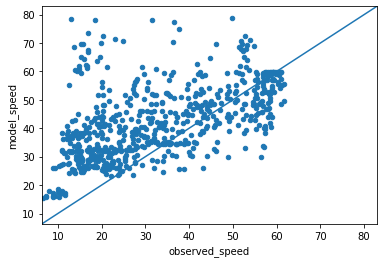

In [48]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
ax = df.plot(kind='scatter', y='model_speed', x='observed_speed')
maxlim = df[['observed_speed','model_speed']].max().max()*1.05
minlim = df[['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed_speed'],df['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

## City of SeaTac

r^2 : 0.6076610494146021


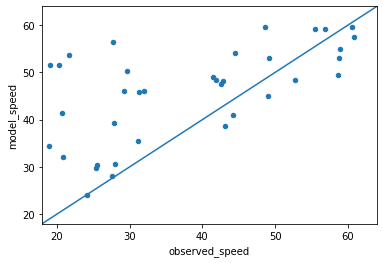

In [49]:
ax = df.loc[df.subarea_flag==1].plot(kind='scatter', y='model_speed', x='observed_speed')
maxlim = df.loc[df.subarea_flag==1][['observed_speed','model_speed']].max().max()*1.05
minlim = df.loc[df.subarea_flag==1][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df[df.subarea_flag==1]['observed_speed'],df[df.subarea_flag==1]['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

## Other Counties

r^2 : 0.556727771509702


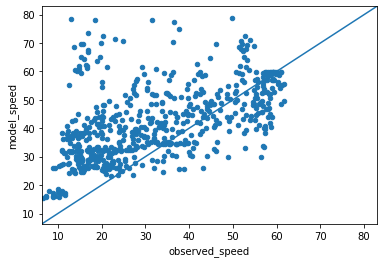

In [50]:
_df = df.loc[df.subarea_flag!=1]
_df = _df.groupby(['Corridor_Number', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda xdf: xdf.length*60/xdf.auto_time)
ax = _df.plot(kind='scatter', y='model_speed', x='observed_speed')
maxlim = _df[['observed_speed','model_speed']].max().max()*1.05
minlim = _df[['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_speed'],_df['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

### AM Peak, Primary Corridors

r^2 : 0.4822219746134578


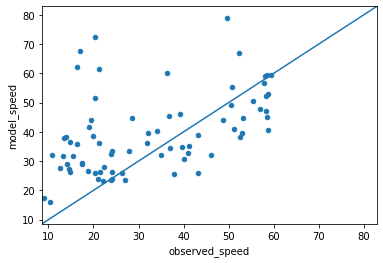

In [51]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
ax = df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df[df['tod'] == '7to8']['observed_speed'],df[df['tod'] == '7to8']['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

In [52]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
546,"SR 529/Broadway/State, 88th St NE to 41st St - SB",72,20
389,"56th Street/Cirque, Alaska to Bridgeport - WB",68,17
398,"56th Street/Cirque, Bridgeport to Alaska - EB",62,16
363,"15th Ave/Elliott, Western Ave to NW 80th St - NB",61,21
85,Tukwila to Bellevue - NB,52,20
298,"SR 522, I-405 to SR 2 - EB",79,50
453,"Bel-Red Road, 124th Ave NE to West Lk Samm - EB",38,13
516,"SR 169, Green Valley Rd to I-405 - NB",44,20
371,"23rd Ave, Rainier Ave S to SR 520 - NB",38,14
358,"SR 9, SR 522 to SR 531 - NB",60,36


## City of SeaTac

r^2 : 0.40375657405400467


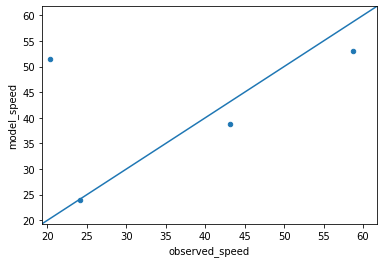

In [53]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df = df.loc[df.subarea_flag==1]
ax = df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df[df['tod'] == '7to8']['observed_speed'],df[df['tod'] == '7to8']['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

In [54]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
85,Tukwila to Bellevue - NB,52,20
49,Seattle to Tacoma - SB,53,59
103,Bellevue to Tukwila - SB,39,43
31,Tacoma to Seattle - NB,24,24


## Other Counties

r^2 : 0.4848144793517161


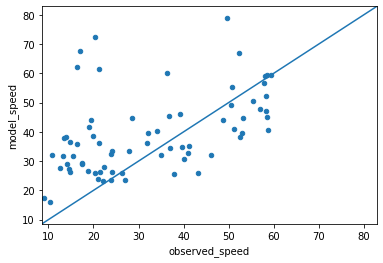

In [55]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df = df.loc[df.subarea_flag!=1]
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
ax = df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df[df['tod'] == '7to8']['observed_speed'],df[df['tod'] == '7to8']['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

In [56]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
510,"SR 529/Broadway/State, 88th St NE to 41st St - SB",72,20
353,"56th Street/Cirque, Alaska to Bridgeport - WB",68,17
362,"56th Street/Cirque, Bridgeport to Alaska - EB",62,16
327,"15th Ave/Elliott, Western Ave to NW 80th St - NB",61,21
262,"SR 522, I-405 to SR 2 - EB",79,50
417,"Bel-Red Road, 124th Ave NE to West Lk Samm - EB",38,13
480,"SR 169, Green Valley Rd to I-405 - NB",44,20
335,"23rd Ave, Rainier Ave S to SR 520 - NB",38,14
322,"SR 9, SR 522 to SR 531 - NB",60,36
498,"SR 161, SR 18 to 264th St - SB",42,19


### PM Peak, Primary Corridors

r^2 : 0.5150486438868442


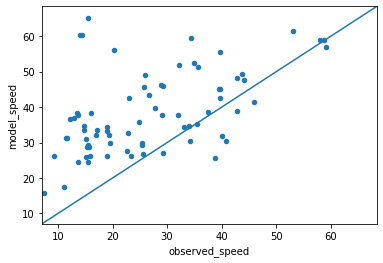

In [57]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
ax = df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df[df['tod'] == '16to17']['observed_speed'],df[df['tod'] == '16to17']['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

In [58]:
df[df['tod'] == '16to17'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
384,"56th Street/Cirque, Alaska to Bridgeport - WB",65,15
393,"56th Street/Cirque, Bridgeport to Alaska - EB",60,14
361,"15th Ave/Elliott, Western Ave to NW 80th St - NB",60,14
354,"SR 9, SR 522 to SR 531 - NB",56,20
327,"SR 3, SR 303 to Loxie Eagans - SB",59,34
529,"SR 161, SR 18 to 264th St - SB",38,13
475,"Kitsap Way/Callow/Burwell, Ferry Terminal to A...",37,12
366,"23rd Ave, Rainier Ave S to SR 520 - NB",38,14
448,"Bel-Red Road, 124th Ave NE to West Lk Samm - EB",37,13
511,"SR 169, Green Valley Rd to I-405 - NB",49,26


## City of SeaTac

r^2 : 0.7713310655470396


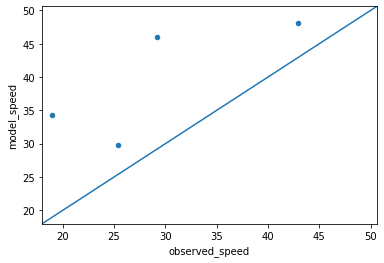

In [59]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df = df.loc[df.subarea_flag==1]
ax = df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df[df['tod'] == '16to17']['observed_speed'],df[df['tod'] == '16to17']['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

In [60]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
75,Tukwila to Bellevue - NB,46,29
93,Bellevue to Tukwila - SB,34,19
21,Tacoma to Seattle - NB,48,43
39,Seattle to Tacoma - SB,30,25


## Other

r^2 : 0.5078794402628836


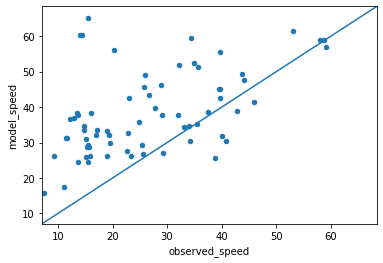

In [61]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df = df.loc[df.subarea_flag!=1]
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
ax = df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df[df['tod'] == '16to17']['observed_speed'],df[df['tod'] == '16to17']['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

In [62]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
348,"56th Street/Cirque, Alaska to Bridgeport - WB",65,15
357,"56th Street/Cirque, Bridgeport to Alaska - EB",60,14
325,"15th Ave/Elliott, Western Ave to NW 80th St - NB",60,14
318,"SR 9, SR 522 to SR 531 - NB",56,20
291,"SR 3, SR 303 to Loxie Eagans - SB",59,34
493,"SR 161, SR 18 to 264th St - SB",38,13
439,"Kitsap Way/Callow/Burwell, Ferry Terminal to A...",37,12
330,"23rd Ave, Rainier Ave S to SR 520 - NB",38,14
412,"Bel-Red Road, 124th Ave NE to West Lk Samm - EB",37,13
475,"SR 169, Green Valley Rd to I-405 - NB",49,26
